In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import platform
from matplotlib import font_manager, rc # Runtime Configuration
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')
    
df = pd.read_csv('bicycle6.csv', encoding='utf-8', index_col=0)
df

,대여일자,대여시간(24),대여소번호,대여소명,대여권,연령대,성별,이동거리(km),사용시간(hr),속도(km/h),년,월
1,2018-12-02,14,1366,1366. 일신초등학교 옆,정기권,30대,M,2.43,0.32,7.59,2018,12
2,2018-06-16,12,1675,1675. 월계문화체육센터,단체권,30대,F,31.01,3.20,9.69,2018,6
3,2018-07-03,11,567,567. 성수역 2번출구 앞,정기권,70대~,M,3.73,0.72,5.18,2018,7
5,2018-04-21,11,3102,3102. 연희삼거리,정기권,30대,M,3.01,0.28,10.75,2018,4
7,2019-09-30,19,111,111. 상수역 2번출구 앞,정기권,20대,M,1.70,0.20,8.50,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020-03-02,18,1288,1288. 문정중교 사거리,일일권,30대,M,12.64,1.55,8.15,2020,3
999996,2018-08-22,8,714,714. 한국SGI 양천문화회관 앞,정기권,20대,F,1.38,0.17,8.12,2018,8
999997,2020-07-01,17,2621,2621. 한성백제역 2번 출구,정기권,70대~,NaN,1.07,0.27,3.96,2020,7
999998,2018-04-16,15,305,305. 종로구청 옆,정기권,40대,F,2.83,0.40,7.08,2018,4


In [2]:
df['연령대'].value_counts()

20대     270832
30대     147281
40대      92456
50대      50552
~10대     26889
60대      12967
70대~      3173
Name: 연령대, dtype: int64

In [48]:
# %로 표현
df['연령대'].value_counts(normalize=True)

20대     0.448286
30대     0.243782
40대     0.153035
50대     0.083675
~10대    0.044507
60대     0.021463
70대~    0.005252
Name: 연령대, dtype: float64

In [3]:
df['월'].value_counts(normalize=True)

7     0.131491
6     0.121645
5     0.119085
10    0.098689
9     0.093429
4     0.089931
8     0.088273
11    0.066957
3     0.055754
12    0.053020
1     0.042700
2     0.039027
Name: 월, dtype: float64

In [49]:
df['년'].value_counts(normalize=True)

2019    0.492750
2020    0.260844
2018    0.246406
Name: 년, dtype: float64

In [4]:
# nuniuqe = num of unique
df['연령대'].nunique()

7

In [5]:
df.head(5)

,대여일자,대여시간(24),대여소번호,대여소명,대여권,연령대,성별,이동거리(km),사용시간(hr),속도(km/h),년,월
1,2018-12-02,14,1366,1366. 일신초등학교 옆,정기권,30대,M,2.43,0.32,7.59,2018,12
2,2018-06-16,12,1675,1675. 월계문화체육센터,단체권,30대,F,31.01,3.20,9.69,2018,6
3,2018-07-03,11,567,567. 성수역 2번출구 앞,정기권,70대~,M,3.73,0.72,5.18,2018,7
5,2018-04-21,11,3102,3102. 연희삼거리,정기권,30대,M,3.01,0.28,10.75,2018,4
7,2019-09-30,19,111,111. 상수역 2번출구 앞,정기권,20대,M,1.70,0.20,8.50,2019,9


In [6]:
df.tail(3)

,대여일자,대여시간(24),대여소번호,대여소명,대여권,연령대,성별,이동거리(km),사용시간(hr),속도(km/h),년,월
999997,2020-07-01,17,2621,2621. 한성백제역 2번 출구,정기권,70대~,NaN,1.07,0.27,3.96,2020,7
999998,2018-04-16,15,305,305. 종로구청 옆,정기권,40대,F,2.83,0.40,7.08,2018,4
999999,2018-07-29,17,1019,1019. 다성이즈빌아파트(호원대 대각선 맞은편),정기권,20대,F,1.21,0.13,9.31,2018,7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604150 entries, 1 to 999999
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   대여일자      604150 non-null  object 
 1   대여시간(24)  604150 non-null  int64  
 2   대여소번호     604150 non-null  int64  
 3   대여소명      604150 non-null  object 
 4   대여권       604150 non-null  object 
 5   연령대       604150 non-null  object 
 6   성별        366920 non-null  object 
 7   이동거리(km)  604150 non-null  float64
 8   사용시간(hr)  604150 non-null  float64
 9   속도(km/h)  604150 non-null  float64
 10  년         604150 non-null  int64  
 11  월         604150 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 59.9+ MB


In [8]:
df.describe()

,대여시간(24),대여소번호,이동거리(km),사용시간(hr),속도(km/h),년,월
count,604150.000000,604150.000000,604150.000000,604150.000000,604150.000000,604150.000000,604150.000000
mean,14.032312,1186.427854,4.647419,0.555990,9.569248,2019.014438,6.800167
std,6.247060,835.176688,6.652068,0.652241,4.381393,0.712069,2.918796
min,0.000000,101.000000,0.010000,0.020000,0.000000,2018.000000,1.000000
25%,9.000000,440.000000,1.310000,0.150000,6.970000,2019.000000,5.000000
50%,15.000000,1119.000000,2.510000,0.320000,9.470000,2019.000000,7.000000
75%,19.000000,1742.000000,5.340000,0.720000,11.950000,2020.000000,9.000000
max,23.000000,4778.000000,230.590000,6.000000,45.000000,2020.000000,12.000000


In [9]:
df.median() # 중앙값 (50%)

대여시간(24)      15.00
대여소번호       1119.00
이동거리(km)       2.51
사용시간(hr)       0.32
속도(km/h)       9.47
년           2019.00
월              7.00
dtype: float64

In [10]:
for col in df.columns: 
    print(col)  

대여일자
대여시간(24)
대여소번호
대여소명
대여권
연령대
성별
이동거리(km)
사용시간(hr)
속도(km/h)
년
월


In [11]:
# 데이터 프레임의 크기: shape (행,열)
size = df.shape
size

(604150, 12)

In [12]:
df.columns

Index(['대여일자', '대여시간(24)', '대여소번호', '대여소명', '대여권', '연령대', '성별', '이동거리(km)',
       '사용시간(hr)', '속도(km/h)', '년', '월'],
      dtype='object')

In [13]:
df.dtypes

대여일자         object
대여시간(24)      int64
대여소번호         int64
대여소명         object
대여권          object
연령대          object
성별           object
이동거리(km)    float64
사용시간(hr)    float64
속도(km/h)    float64
년             int64
월             int64
dtype: object

In [14]:
months = df['월']
type(months)

pandas.core.series.Series

In [15]:
# 연령대 대여권 대여시간 
subset = df[['연령대', '대여권', '대여시간(24)']]
# type(subset)
subset

,연령대,대여권,대여시간(24)
1,30대,정기권,14
2,30대,단체권,12
3,70대~,정기권,11
5,30대,정기권,11
7,20대,정기권,19
...,...,...,...
999995,30대,일일권,18
999996,20대,정기권,8
999997,70대~,정기권,17
999998,40대,정기권,15


In [16]:
# loc - 문자열 접근 
# df.loc[:, ['성별']]
print(df.loc[:, ['성별', '대여권']])            # : 모든행출력 

         성별  대여권
1         M  정기권
2         F  단체권
3         M  정기권
5         M  정기권
7         M  정기권
...     ...  ...
999995    M  일일권
999996    F  정기권
999997  NaN  정기권
999998    F  정기권
999999    F  정기권

[604150 rows x 2 columns]


In [17]:
subset = df.loc[:, ['년','대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
subset

,년,대여권,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
1,2018,정기권,14,2.43,0.32,7.59
2,2018,단체권,12,31.01,3.20,9.69
3,2018,정기권,11,3.73,0.72,5.18
5,2018,정기권,11,3.01,0.28,10.75
7,2019,정기권,19,1.70,0.20,8.50
...,...,...,...,...,...,...
999995,2020,일일권,18,12.64,1.55,8.15
999996,2018,정기권,8,1.38,0.17,8.12
999997,2020,정기권,17,1.07,0.27,3.96
999998,2018,정기권,15,2.83,0.40,7.08


In [18]:
print(df.loc[5, '성별'])                # df.loc[row, column]

M


In [19]:
# iloc - 숫자 기준 -> 행, 렬
print(df.iloc[0, 1])                   # [행, 렬]

14


In [20]:
print(df.iloc[0:5, 6:8])                 # slice

  성별  이동거리(km)
1  M      2.43
2  F     31.01
3  M      3.73
5  M      3.01
7  M      1.70


In [21]:
df.columns

Index(['대여일자', '대여시간(24)', '대여소번호', '대여소명', '대여권', '연령대', '성별', '이동거리(km)',
       '사용시간(hr)', '속도(km/h)', '년', '월'],
      dtype='object')

In [22]:
df.iloc[:, [4,5,9,11]]

,대여권,연령대,속도(km/h),월
1,정기권,30대,7.59,12
2,단체권,30대,9.69,6
3,정기권,70대~,5.18,7
5,정기권,30대,10.75,4
7,정기권,20대,8.50,9
...,...,...,...,...
999995,일일권,30대,8.15,3
999996,정기권,20대,8.12,8
999997,정기권,70대~,3.96,7
999998,정기권,40대,7.08,4


In [23]:
# iloc 행 - 조건
df.iloc[:, [1,5,6,7,8,9,10]].query('성별 == "F"')

,대여시간(24),연령대,성별,이동거리(km),사용시간(hr),속도(km/h),년
2,12,30대,F,31.01,3.20,9.69,2018
15,17,30대,F,2.62,0.33,7.94,2020
17,21,30대,F,1.69,0.60,2.82,2019
21,18,30대,F,0.76,0.10,7.60,2020
23,21,50대,F,14.28,1.17,12.21,2019
...,...,...,...,...,...,...,...
999983,11,20대,F,1.72,0.42,4.10,2020
999991,23,20대,F,6.82,0.57,11.96,2019
999996,8,20대,F,1.38,0.17,8.12,2018
999998,15,40대,F,2.83,0.40,7.08,2018


In [24]:
# range  
r = range(4)  # column 0 ~ 3
df.iloc[:, r]

,대여일자,대여시간(24),대여소번호,대여소명
1,2018-12-02,14,1366,1366. 일신초등학교 옆
2,2018-06-16,12,1675,1675. 월계문화체육센터
3,2018-07-03,11,567,567. 성수역 2번출구 앞
5,2018-04-21,11,3102,3102. 연희삼거리
7,2019-09-30,19,111,111. 상수역 2번출구 앞
...,...,...,...,...
999995,2020-03-02,18,1288,1288. 문정중교 사거리
999996,2018-08-22,8,714,714. 한국SGI 양천문화회관 앞
999997,2020-07-01,17,2621,2621. 한성백제역 2번 출구
999998,2018-04-16,15,305,305. 종로구청 옆


In [25]:
# 연령대를 index로 
df.set_index('연령대')

,대여일자,대여시간(24),대여소번호,대여소명,대여권,성별,이동거리(km),사용시간(hr),속도(km/h),년,월
연령대,,,,,,,,,,,
30대,2018-12-02,14,1366,1366. 일신초등학교 옆,정기권,M,2.43,0.32,7.59,2018,12
30대,2018-06-16,12,1675,1675. 월계문화체육센터,단체권,F,31.01,3.20,9.69,2018,6
70대~,2018-07-03,11,567,567. 성수역 2번출구 앞,정기권,M,3.73,0.72,5.18,2018,7
30대,2018-04-21,11,3102,3102. 연희삼거리,정기권,M,3.01,0.28,10.75,2018,4
20대,2019-09-30,19,111,111. 상수역 2번출구 앞,정기권,M,1.70,0.20,8.50,2019,9
...,...,...,...,...,...,...,...,...,...,...,...
30대,2020-03-02,18,1288,1288. 문정중교 사거리,일일권,M,12.64,1.55,8.15,2020,3
20대,2018-08-22,8,714,714. 한국SGI 양천문화회관 앞,정기권,F,1.38,0.17,8.12,2018,8
70대~,2020-07-01,17,2621,2621. 한성백제역 2번 출구,정기권,NaN,1.07,0.27,3.96,2020,7


In [26]:
# 연령대 (~10대) - 대여권, 대여시간, 이동거리, 사용시간, 속도
ds10s = df.set_index('연령대').loc['~10대',['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
ds10s.head()

,대여권,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
연령대,,,,,
~10대,일일권,20,4.41,0.33,13.36
~10대,정기권,11,1.72,0.20,8.60
~10대,일일권,18,4.25,0.85,5.00
~10대,정기권,7,0.68,0.07,9.71
~10대,일일권,23,3.86,0.23,16.78


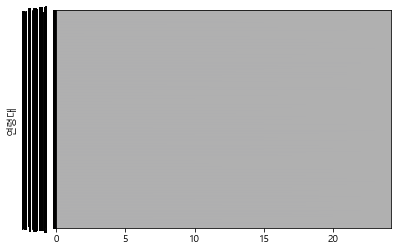

In [65]:
ds10s['대여시간(24)'].plot(kind='barh', grid=True)
plt.show()

In [27]:
ds10s.describe()

,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
count,26889.000000,26889.000000,26889.000000,26889.000000
mean,14.883038,4.591676,0.585511,9.105572
std,6.559132,7.049557,0.723435,4.323086
min,0.000000,0.010000,0.020000,0.000000
25%,12.000000,1.300000,0.150000,6.460000
50%,17.000000,2.410000,0.320000,8.890000
75%,20.000000,5.030000,0.750000,11.320000
max,23.000000,197.610000,5.970000,44.890000


In [28]:
# 20대 - 대여권, 대여시간, 이동거리, 사용시간, 속도
ds20s = df.set_index('연령대').loc['20대',['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
ds20s.head()

,대여권,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
연령대,,,,,
20대,정기권,19,1.70,0.20,8.50
20대,정기권,15,1.19,0.07,17.00
20대,정기권,17,2.36,0.23,10.26
20대,정기권,9,0.90,0.38,2.37
20대,정기권,11,1.66,0.18,9.22


In [29]:
ds20s.describe()

,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
count,270832.000000,270832.000000,270832.000000,270832.000000
mean,14.404409,4.911036,0.590600,9.525859
std,6.326598,7.307456,0.714522,4.364273
min,0.000000,0.010000,0.020000,0.000000
25%,10.000000,1.350000,0.150000,6.980000
50%,16.000000,2.600000,0.320000,9.380000
75%,19.000000,5.560000,0.770000,11.770000
max,23.000000,230.590000,6.000000,44.980000


In [30]:
# 70대 - 대여권, 대여시간, 이동거리, 사용시간, 속도
ds70s = df.set_index('연령대').loc['70대~',['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]
ds70s.head()

,대여권,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
연령대,,,,,
70대~,정기권,11,3.73,0.72,5.18
70대~,정기권,5,1.65,0.23,7.17
70대~,정기권,6,0.87,0.08,10.88
70대~,정기권,11,2.50,0.12,20.83
70대~,일일권,19,1.58,0.22,7.18


In [31]:
ds70s.describe()

,대여시간(24),이동거리(km),사용시간(hr),속도(km/h)
count,3173.000000,3173.000000,3173.000000,3173.000000
mean,12.521273,3.507910,0.488957,8.667201
std,6.100871,4.343816,0.500004,4.437021
min,0.000000,0.010000,0.020000,0.030000
25%,8.000000,1.160000,0.150000,5.460000
50%,13.000000,2.080000,0.300000,8.700000
75%,17.000000,3.960000,0.650000,11.430000
max,23.000000,61.780000,3.750000,44.560000


In [32]:
# --------------------------------------------GROUP BY-------------------------------------------------------
                                         #연령대별 -> 사용시간/이동거리/속도
grouped_age_df = df.groupby('연령대')

In [62]:
age_plot = grouped_age_df[['사용시간(hr)', '이동거리(km)', '속도(km/h)']].mean()
age_plot

,사용시간(hr),이동거리(km),속도(km/h)
연령대,,,
20대,0.590600,4.911036,9.525859
30대,0.532217,4.533074,9.712704
40대,0.527742,4.422659,9.651403
50대,0.487778,4.189637,9.641386
60대,0.525678,4.221814,9.161338
70대~,0.488957,3.507910,8.667201
~10대,0.585511,4.591676,9.105572


In [34]:
# 대여시간 별 - 사용시간/이동거리/속도
grouped_time_df = df.groupby('대여시간(24)')

In [35]:
grouped_time_df[['사용시간(hr)', '이동거리(km)', '속도(km/h)']].mean()

,사용시간(hr),이동거리(km),속도(km/h)
대여시간(24),,,
0,0.429448,3.832833,10.176759
1,0.406978,3.769189,10.306449
2,0.380315,3.565458,10.473500
3,0.376560,3.556897,10.510142
4,0.369947,3.556896,10.748413
5,0.362521,3.469015,11.227234
6,0.348917,3.520979,11.736888
7,0.338499,3.537059,11.598942
8,0.325537,3.195966,11.138960


In [36]:
# 성별 - 사용시간/이동거리/속도
grouped_sex_df = df.groupby('성별')

In [37]:
sex_plot = grouped_sex_df[['사용시간(hr)', '이동거리(km)', '속도(km/h)']].mean()
sex_plot

,사용시간(hr),이동거리(km),속도(km/h)
성별,,,
F,0.565240,4.576897,9.014206
M,0.466686,4.024572,10.112328
\N,0.365572,3.142352,10.440070


<AxesSubplot:xlabel='성별'>

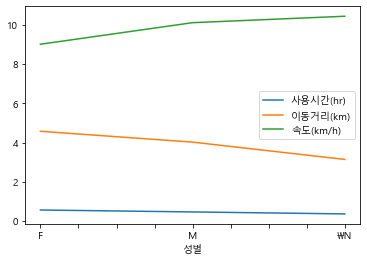

In [38]:
sex_plot.plot()

In [39]:
# 연도 별 - 사용시간/이동거리/속도
grouped_yr_df = df.groupby('년')

In [40]:
yr_plot = grouped_yr_df[['사용시간(hr)', '이동거리(km)', '속도(km/h)']].mean()
yr_plot

,사용시간(hr),이동거리(km),속도(km/h)
년,,,
2018,0.495492,4.258253,9.904782
2019,0.530407,4.648569,9.806558
2020,0.661468,5.012870,8.803996


<AxesSubplot:xlabel='년'>

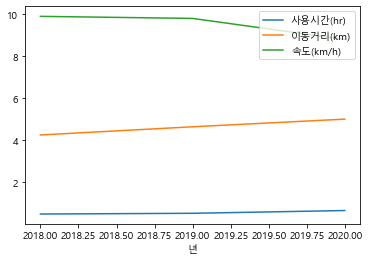

In [41]:
yr_plot.plot()

In [42]:
# 월별 - 사용시간/이동거리/속도
grouped_mth_df = df.groupby('월')

In [43]:
grouped_mth_df[['사용시간(hr)', '이동거리(km)', '속도(km/h)']].mean()

,사용시간(hr),이동거리(km),속도(km/h)
월,,,
1,0.353034,2.972759,10.409988
2,0.396590,3.394052,10.237261
3,0.622464,5.337944,9.578308
4,0.627747,5.237050,9.464098
5,0.637981,5.222502,9.335921
6,0.602922,5.067470,9.450412
7,0.568634,4.737251,9.260666
8,0.564755,4.908133,9.740895
9,0.618200,5.137637,9.411894


In [44]:
# 대여권 별 - 사용시간/이동거리/속도
grouped_membership_df = df.groupby('대여권')
grouped_membership_df[['사용시간(hr)', '이동거리(km)', '속도(km/h)']].mean()

,사용시간(hr),이동거리(km),속도(km/h)
대여권,,,
단체권,1.557690,11.831594,7.684933
일일권,0.877108,6.993269,8.651926
정기권,0.470938,4.027274,9.803516


In [45]:
# 그룹화된 데이터의 빈도(갯수) 카운트
# df.groupby('col')['col'].nunique()

In [46]:
# --------------------------------------------시각화-------------------------------------------------------

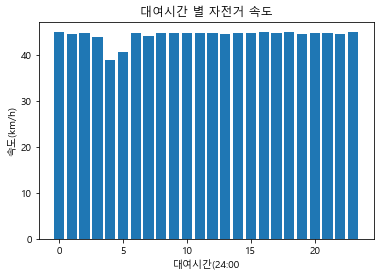

In [58]:
# 대여시간(24) & 속도 
# plt.bar(df['대여시간(24)'], df['속도(km/h)'])

# plt.xlabel('대여시간(24:00')
# plt.ylabel('속도(km/h)')
# plt.title('대여시간 별 자전거 속도')

# plt.show()

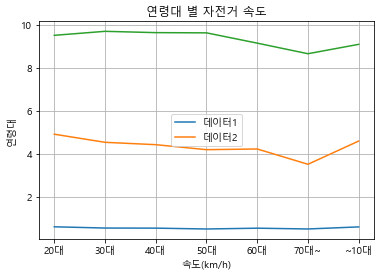

In [63]:
plt.plot(age_plot) 
plt.legend(['데이터1', '데이터2'])
plt.xlabel('속도(km/h)')
plt.ylabel('연령대')
plt.title('연령대 별 자전거 속도')
plt.grid(True)
plt.show()

In [ ]:
# 안됨

# 조건 입력 : 연령대 - 대여권, 대여시간, 이동거리, 사용시간, 속도
# cond_ds30s = (df.년 == '30대')
# df.loc[cond_ds30s, ['대여권', '대여시간(24)', '이동거리(km)', '사용시간(hr)', '속도(km/h)']]


# dataset (ds) 연도별

# ds2020 = df[df['년'] == '2020']  

# yr2020 = df[df.년 != '2019']
# yr2020 = df[df.년 != '2018']
# yr2020.head()